#Context
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

##Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

##Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
case_status: Flag indicating if the Visa was certified or denied

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/EasyVisa.csv")

In [ ]:
df = d1.copy()

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in case_id are :
case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_

In [ ]:
df.drop(["case_id"], axis=1, inplace=True)

##EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

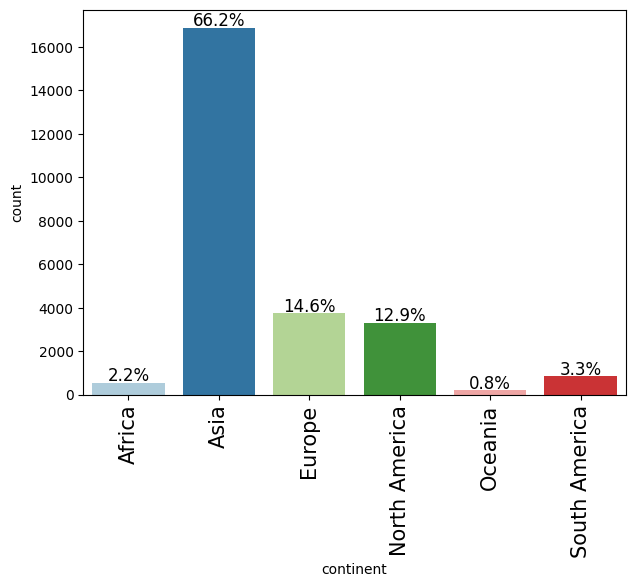

In [ ]:
labeled_barplot(df, "continent", perc=True)

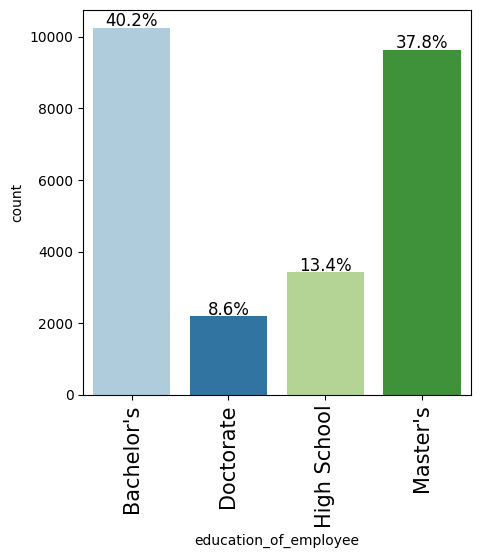

In [ ]:
labeled_barplot(df, "education_of_employee", perc=True)

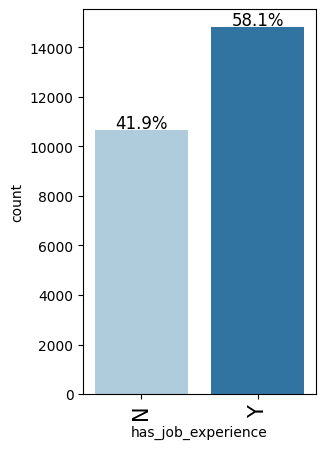

In [ ]:
labeled_barplot(df, "has_job_experience", perc= True)

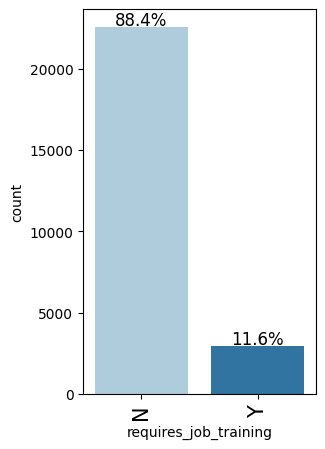

In [ ]:
labeled_barplot(df, "requires_job_training", perc=True)

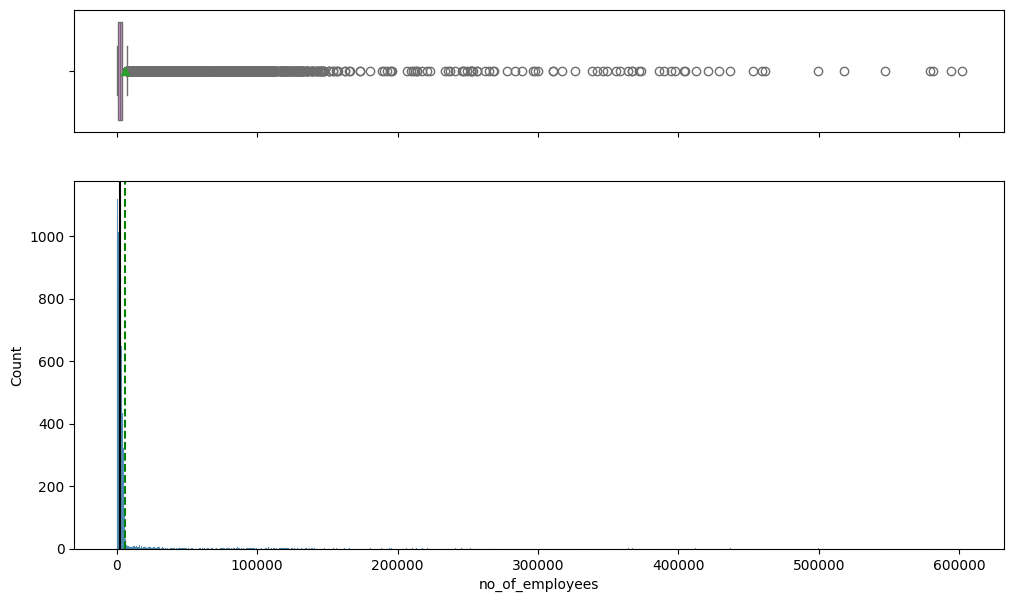

In [ ]:
histogram_boxplot(df, "no_of_employees")

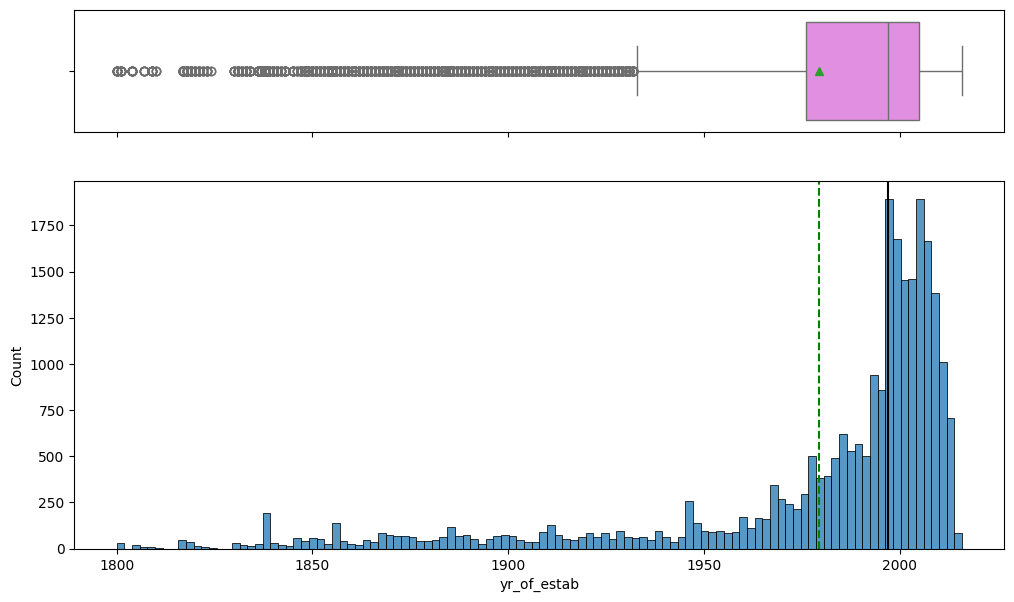

In [ ]:
histogram_boxplot(df, "yr_of_estab")


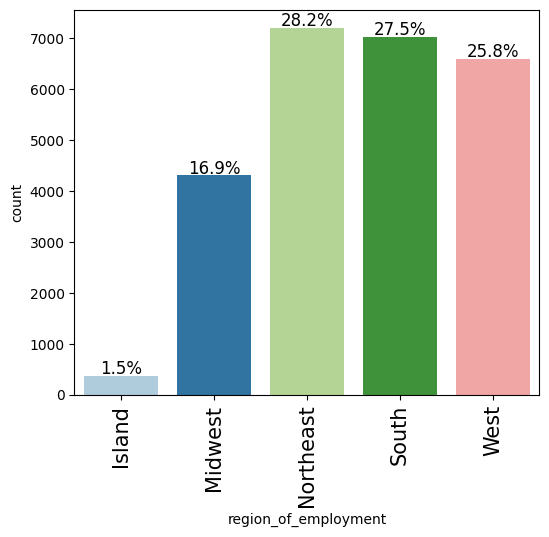

In [ ]:
labeled_barplot(df, 'region_of_employment', perc= True)

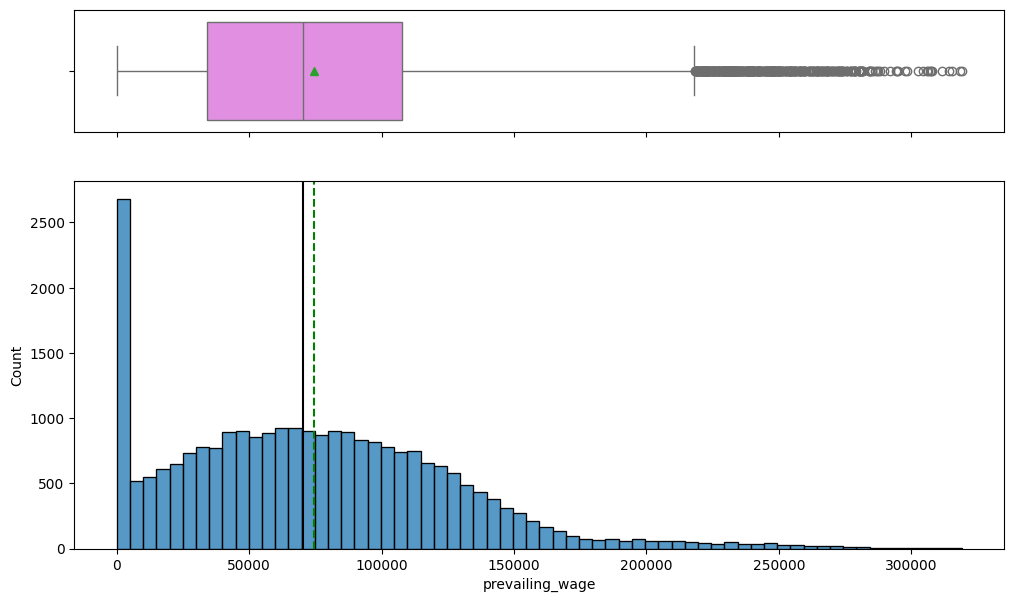

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

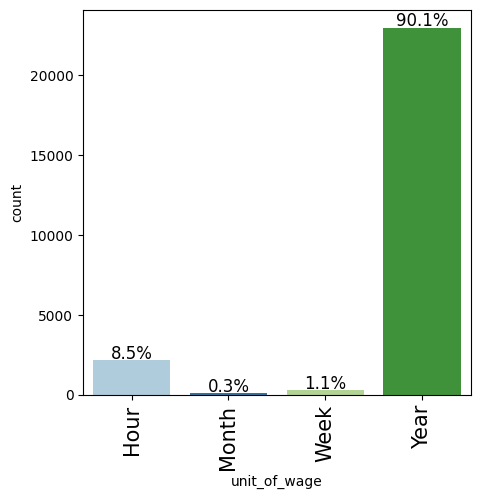

In [ ]:
labeled_barplot(df, 'unit_of_wage', perc=True)

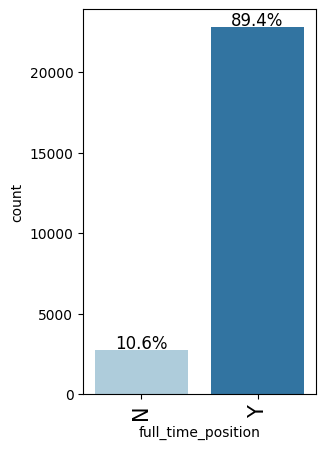

In [ ]:
labeled_barplot(df, 'full_time_position', perc = True)

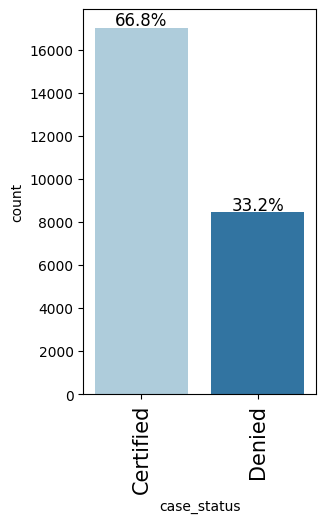

In [ ]:
labeled_barplot(df, 'case_status', perc = True)

#Bivariate Analysis

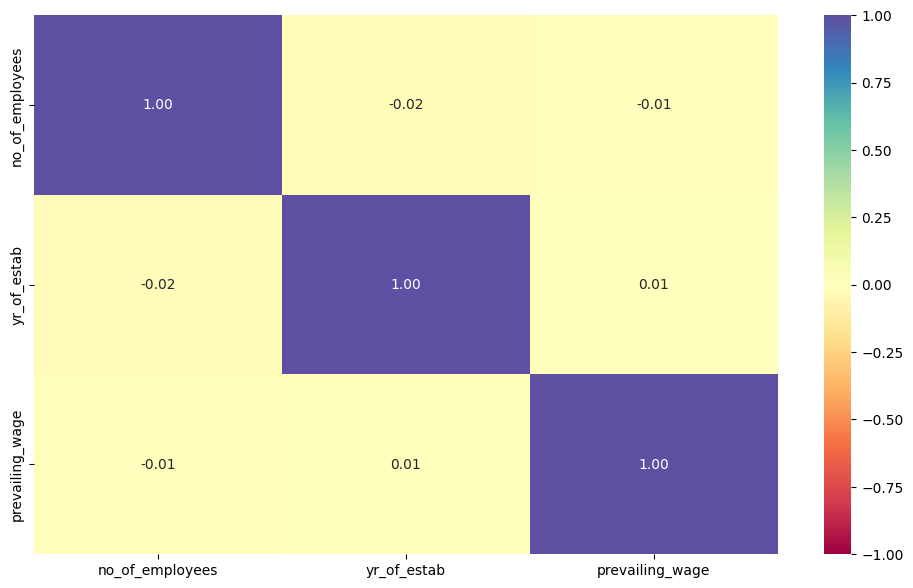

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


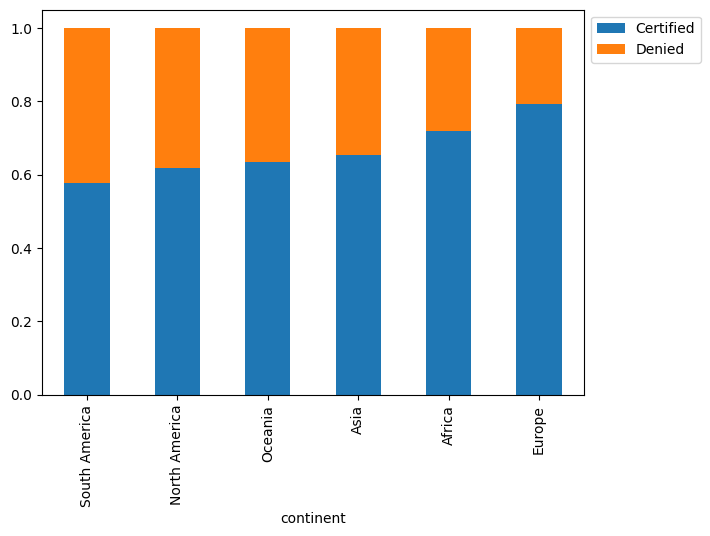

In [ ]:
stacked_barplot(df, "continent", "case_status")

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


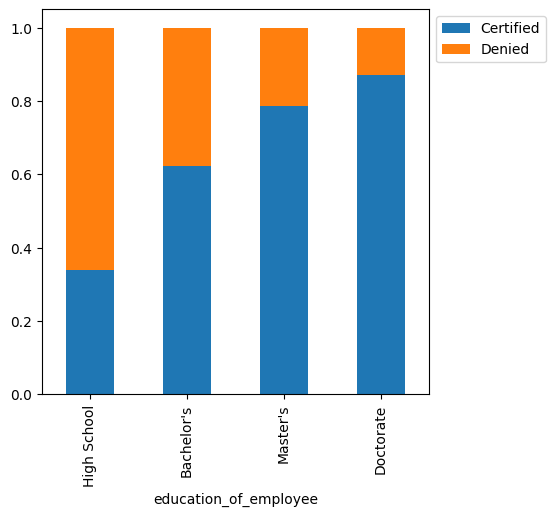

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


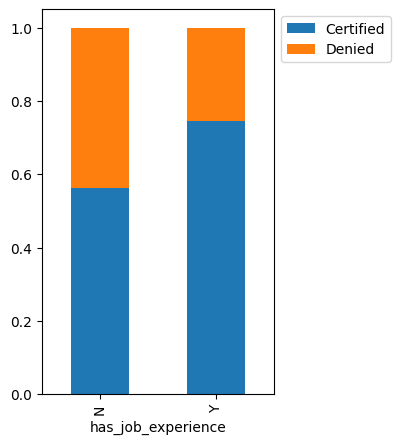

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


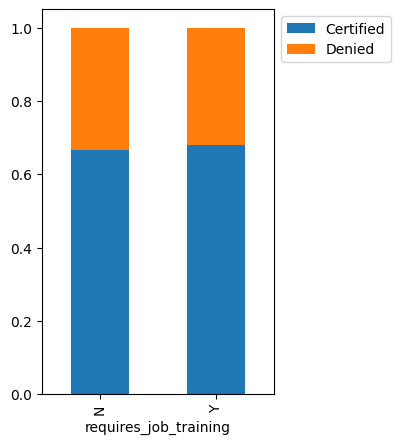

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


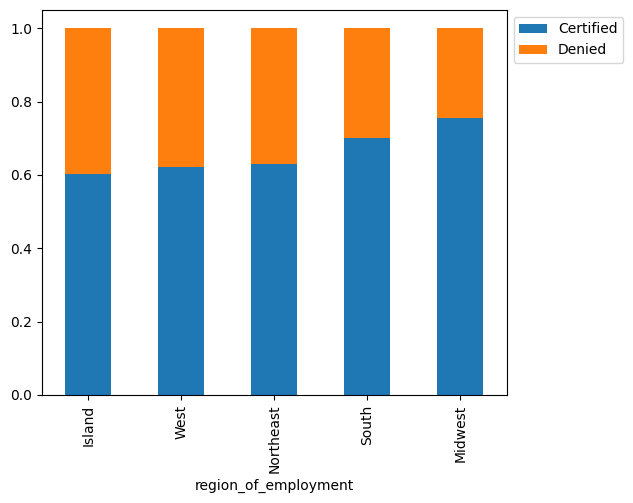

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


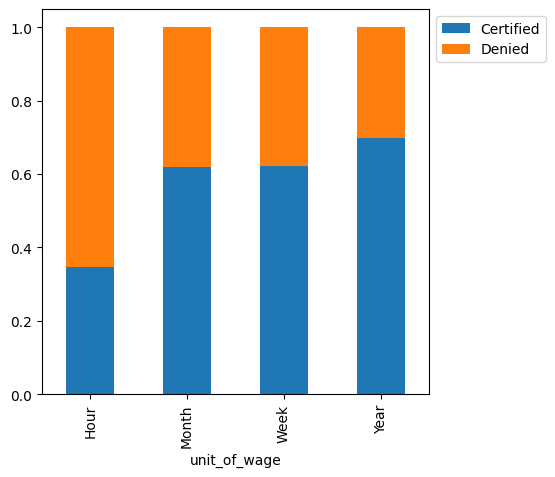

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


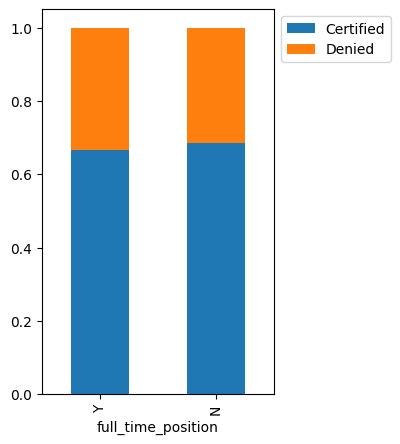

In [ ]:
stacked_barplot(df, "full_time_position", "case_status")

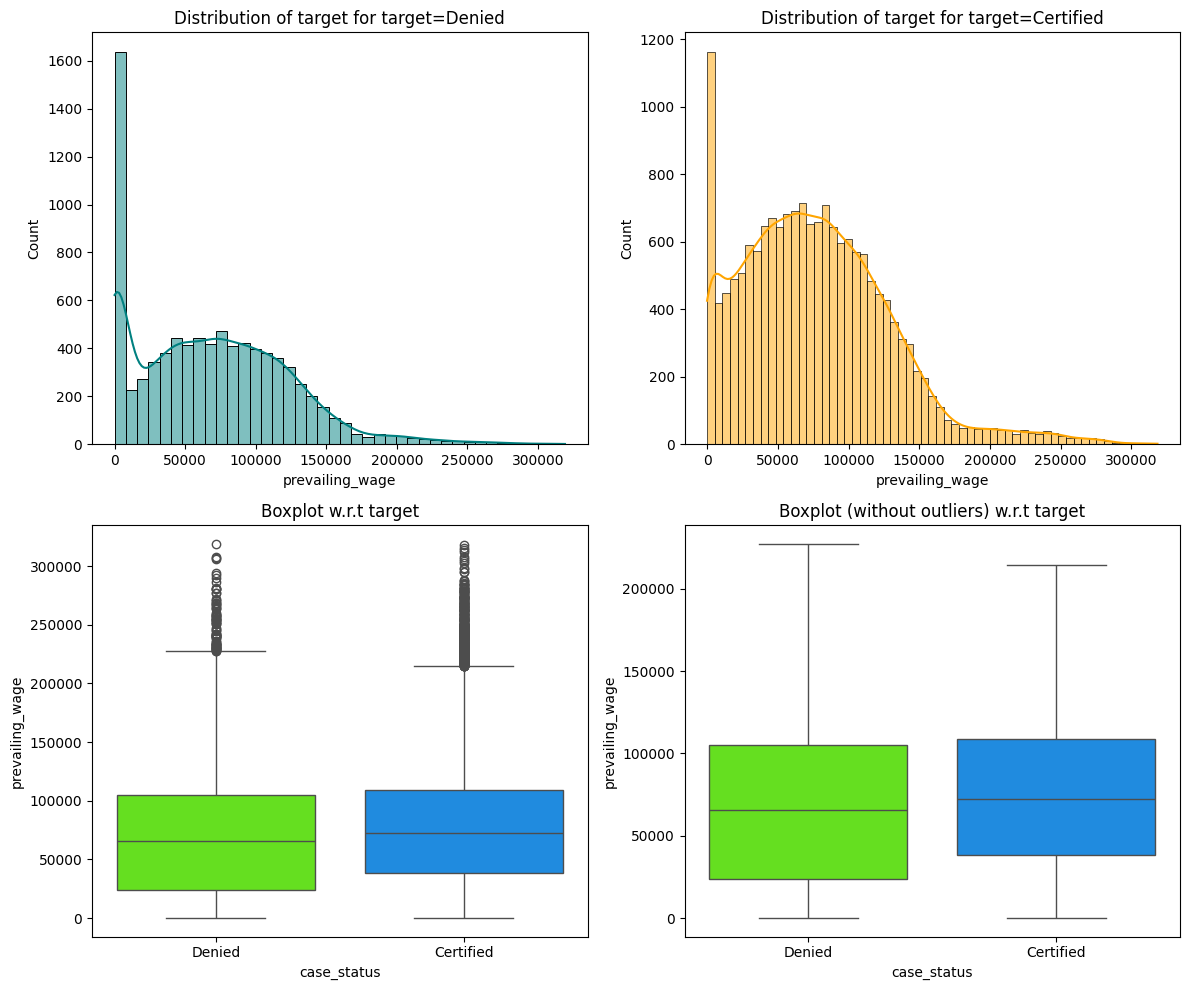

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

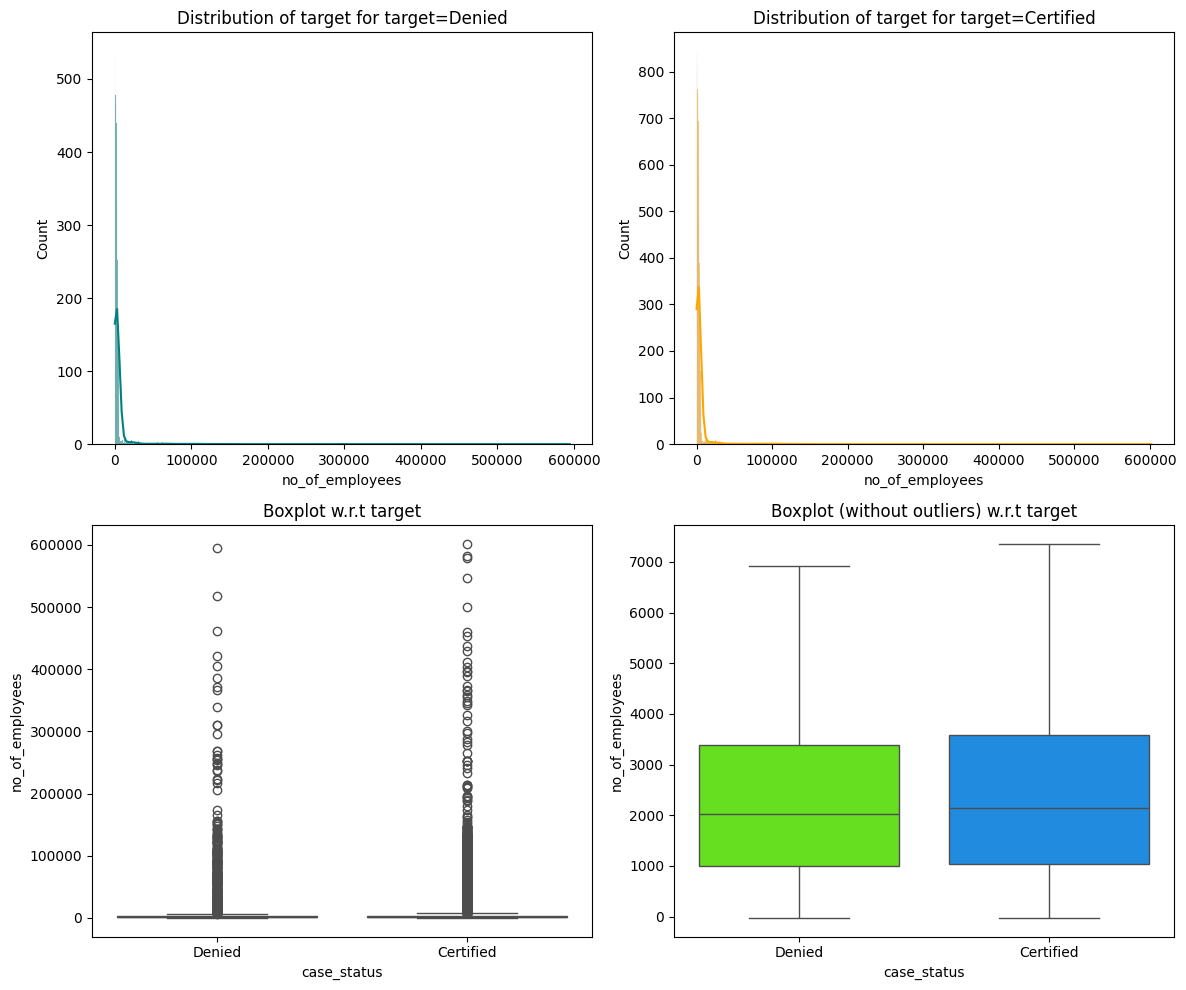

In [ ]:
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

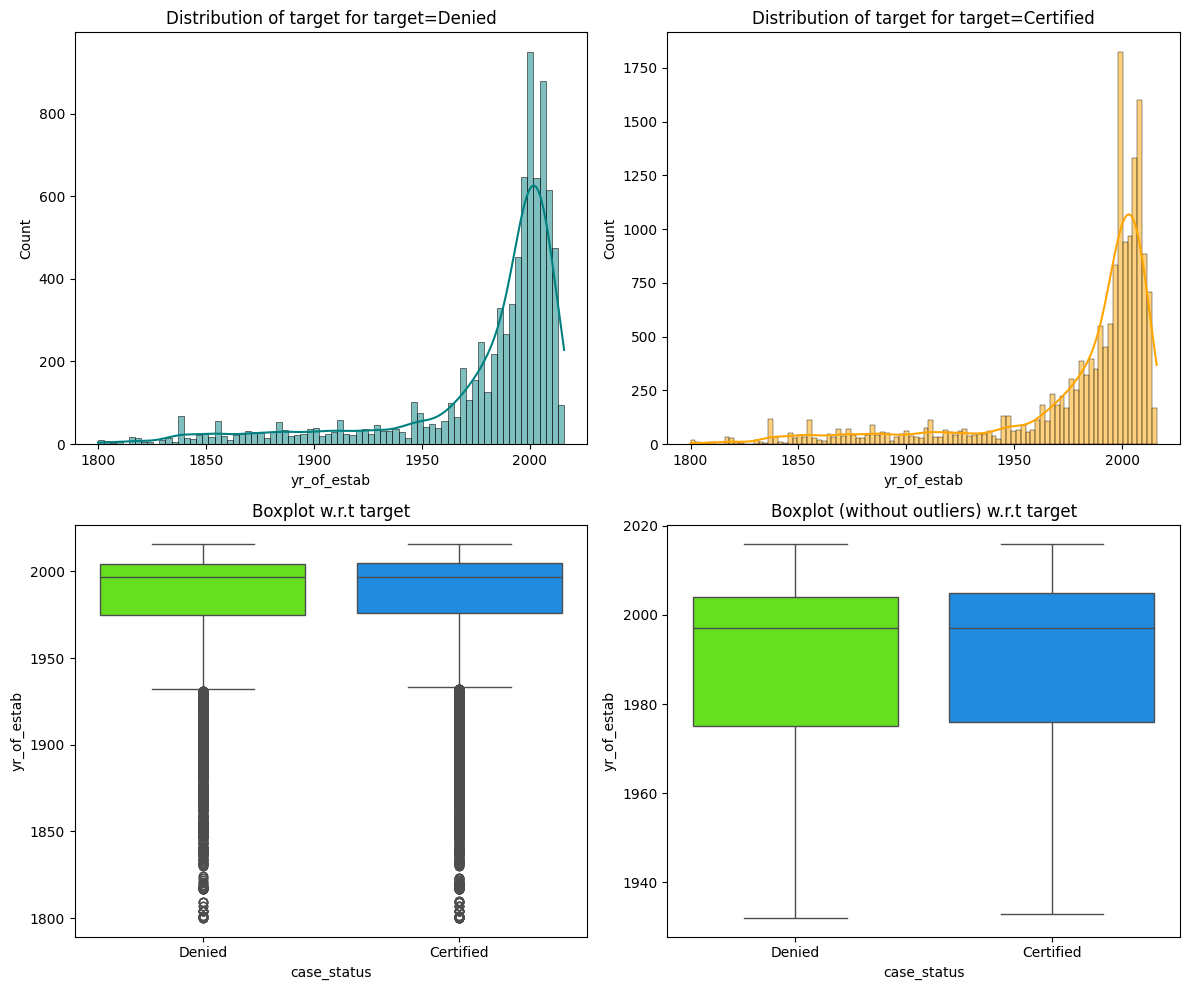

In [ ]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

In [221]:
def pair_plot(data, features, figsize=(10, 10)):
    """
    Pair plot for numerical features.

    data: dataframe
    features: list of features to plot
    figsize: size of the figure (default (10, 10))
    """
    sns.pairplot(data[features])
    plt.suptitle('Pair Plot', y=1.02)
    plt.show()

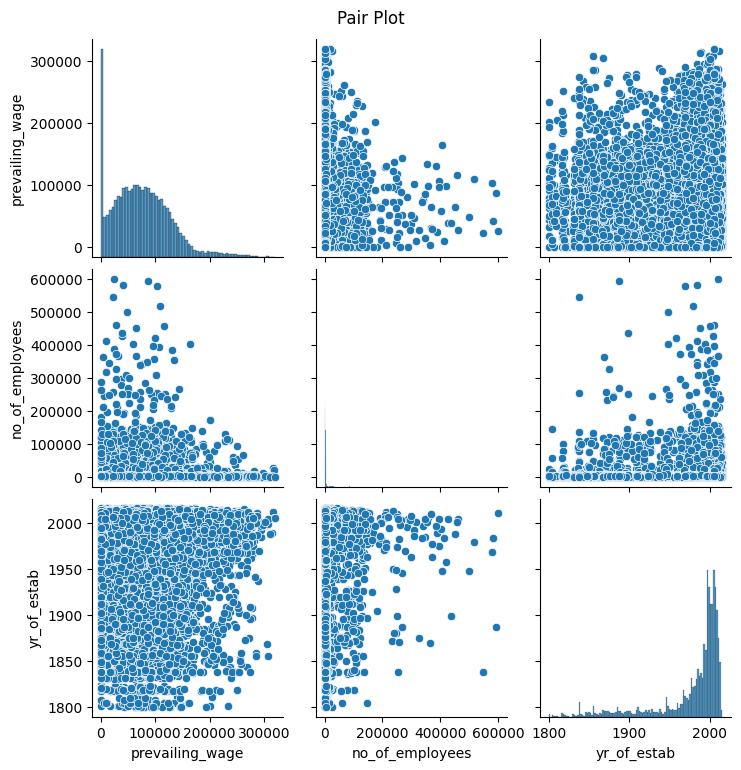

In [222]:
pair_plot(df, ['prevailing_wage', 'no_of_employees', 'yr_of_estab'])

In [225]:
def box_plot(data, x_feature, y_feature, figsize=(10, 6)):
    """
    Box plot for a categorical feature vs a numerical feature.

    data: dataframe
    x_feature: categorical feature
    y_feature: numerical feature
    figsize: size of the figure (default (10, 6))
    """
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=x_feature, y=y_feature, palette="Set3")
    plt.title(f'Box Plot of {y_feature} by {x_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.xticks(rotation=45)
    plt.show()


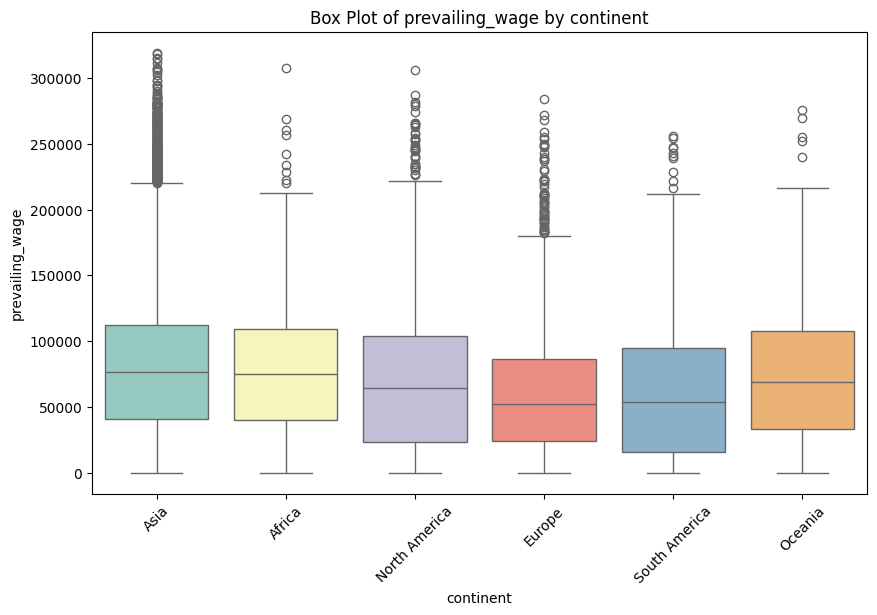

In [226]:
box_plot(df, 'continent', 'prevailing_wage')

In [227]:
def count_plot(data, x_feature, hue_feature=None, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=x_feature, hue=hue_feature, palette="Set3")
    plt.title(f'Count Plot of {x_feature}')
    plt.xlabel(x_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


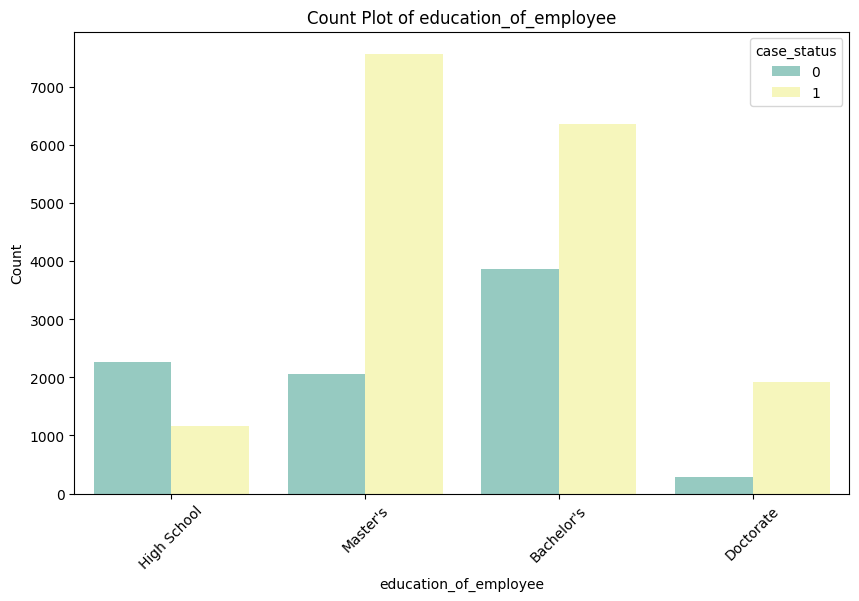

In [228]:
count_plot(df, 'education_of_employee', 'case_status')

#Data Preprocessing

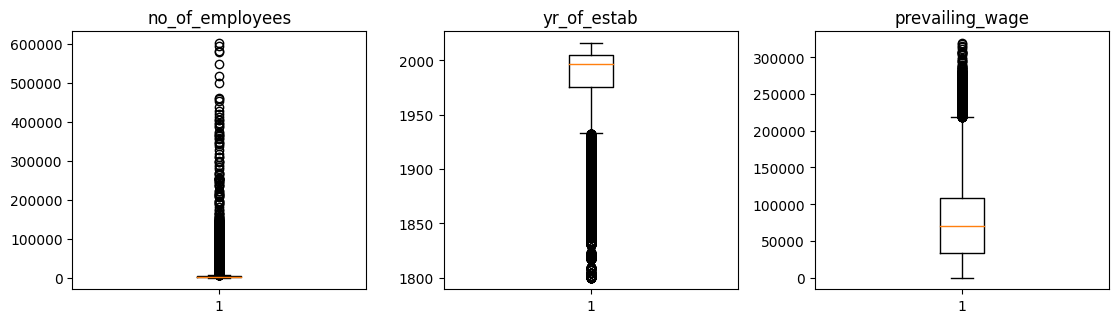

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Check if "case_status" is in the list before removing
if "case_status" in numeric_columns:
    numeric_columns.remove("case_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data = df.copy()

Missing Value

In [ ]:
# Identify and replace non-positive 'no_of_employees' with its median
data.loc[data.no_of_employees <= 0, "no_of_employees"] = data.no_of_employees.median()

# Print number of replaced rows and the new minimum value
print(f"{(data.no_of_employees <= 0).sum()} rows were updated.")
print(f"The new minimum number of employees is {data.no_of_employees.min()}.")

0 rows were updated.
The new minimum number of employees is 12.


In [ ]:
pd.value_counts(data["unit_of_wage"])

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


##Data Prepration for modeling

In [ ]:
df['case_status'] = df['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

X = df.drop(['case_status'],axis=1)
y = df['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [ ]:
# Initialize Decision Tree Model
dt = DecisionTreeClassifier(random_state=1)

In [ ]:
# Fit the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Model performance on training data
print("Decision Tree: Training Performance")
print(model_performance_classification_sklearn(dt, X_train, y_train))

Decision Tree: Training Performance
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Decision Tree: Confusion Matrix on Train Data


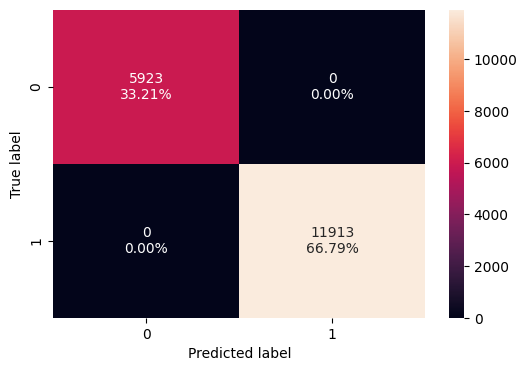

In [ ]:
# Confusion Matrix
print("Decision Tree: Confusion Matrix on Train Data")
confusion_matrix_sklearn(dt, X_train, y_train)

In [ ]:
print('Decesion Tree: Performance on Test Data')
print(model_performance_classification_sklearn(dt, X_test, y_test))

Decesion Tree: Performance on Test Data
   Accuracy  Recall  Precision    F1
0     0.664   0.743      0.752 0.747


Decision Tree: Confusion Matrix on Test Data


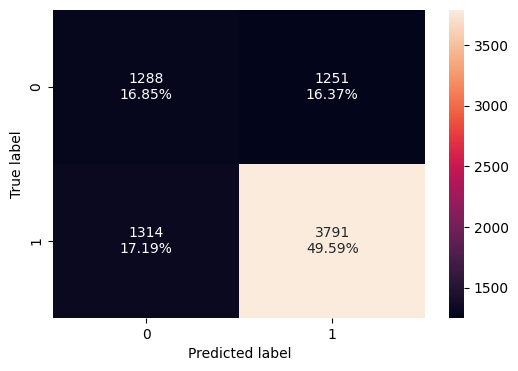

In [ ]:
print("Decision Tree: Confusion Matrix on Test Data")
confusion_matrix_sklearn(dt, X_test, y_test)

### Bagging Classifier

In [ ]:
# Initialize Bagging Classifier with Decision Tree as base estimator
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [ ]:
# Fit the model on the training data
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [ ]:
# Model performance on training data
print("Bagging: Training Performance")
print(model_performance_classification_sklearn(bagging, X_train, y_train))

Bagging: Training Performance
   Accuracy  Recall  Precision    F1
0     0.985   0.986      0.992 0.989


Bagging: Confusion Matrix on Train Data


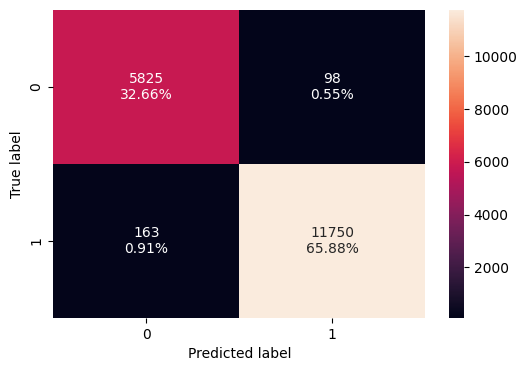

In [ ]:
# Confusion Matrix
print("Bagging: Confusion Matrix on Train Data")
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
# Model performance on test data
print("Bagging: Test Performance")
print(model_performance_classification_sklearn(bagging, X_test, y_test))

Bagging: Test Performance
   Accuracy  Recall  Precision    F1
0     0.692   0.766      0.771 0.769


Bagging: Confusion Matrix on Test Data


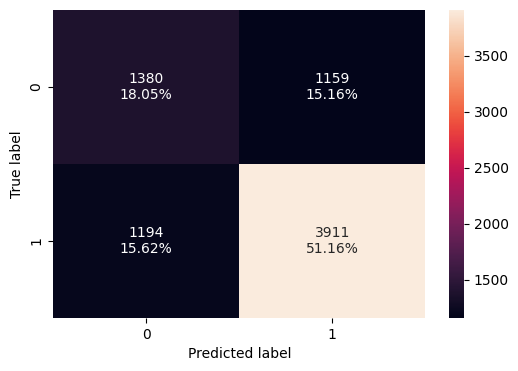

In [ ]:
# Confusion Matrix
print("Bagging: Confusion Matrix on Test Data")
confusion_matrix_sklearn(bagging, X_test, y_test)

* **Good Accuracy:** The model achieves around 69% accuracy on the test data, indicating decent performance on unseen data.
* **More False Negatives:** Compared to the training data, there's an increase in False Negatives. This means the model is more likely to incorrectly predict 'Denied' when the actual outcome is 'Certified'.
* **Recall for Certified Cases:** Although there's a slight drop in overall accuracy compared to the training data, the model still maintains a good recall for 'Certified' cases. This is important as it minimizes the risk of rejecting potentially viable visa applications.

#Random Forest

In [ ]:
rf= RandomForestClassifier(random_state=1)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
print("Random Forest: Training Performance")
print(model_performance_classification_sklearn(rf, X_train, y_train))

Random Forest: Training Performance
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Random Forest: Confusion Matrix on Train Data


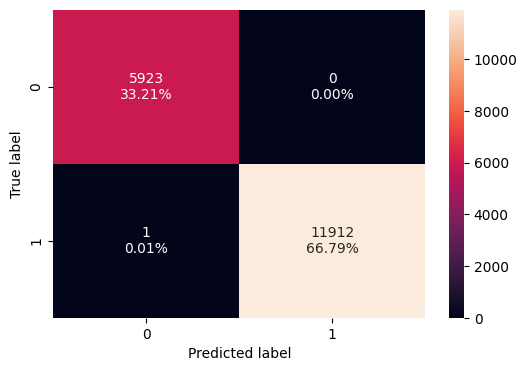

In [ ]:
# Confusion Matrix
print("Random Forest: Confusion Matrix on Train Data")
confusion_matrix_sklearn(rf,X_train, y_train)

In [ ]:
# Model performance on test data
print("Random Forest: Test Performance")
print(model_performance_classification_sklearn(rf, X_test, y_test))

Random Forest: Test Performance
   Accuracy  Recall  Precision    F1
0     0.719   0.830      0.768 0.798


Random Forest: Confusion Matrix on Test Data


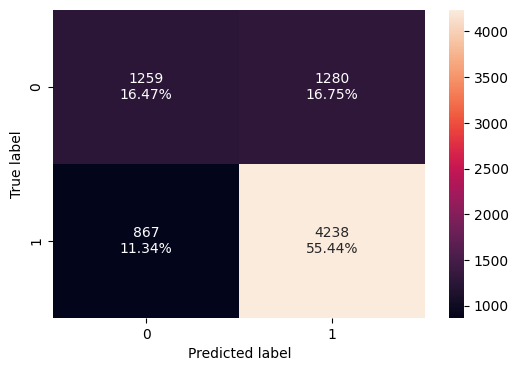

In [ ]:
print("Random Forest: Confusion Matrix on Test Data")
confusion_matrix_sklearn(rf, X_test, y_test)

#Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=1)

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
print("performnace on training data")
print(model_performance_classification_sklearn(gb, X_train, y_train))

performnace on training data
   Accuracy  Recall  Precision    F1
0     0.759   0.883      0.784 0.831


confusion matrix on training data


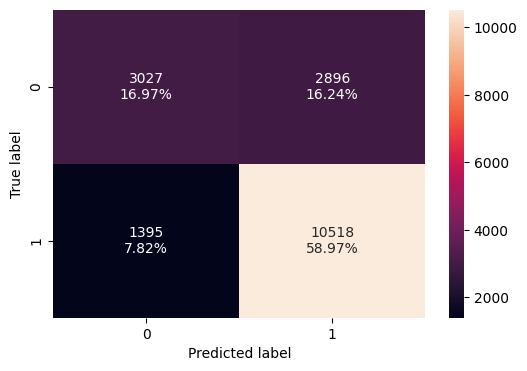

In [ ]:
print("confusion matrix on training data")
confusion_matrix_sklearn(gb, X_train, y_train)

In [ ]:
print("performnace on test data")
print(model_performance_classification_sklearn(gb, X_test, y_test))

performnace on test data
   Accuracy  Recall  Precision    F1
0     0.745   0.873      0.774 0.820


cofusion matrix on test data


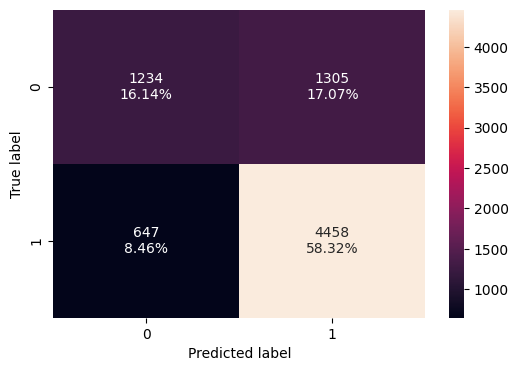

In [ ]:
print("cofusion matrix on test data")
confusion_matrix_sklearn(gb, X_test, y_test)

#Adaboost

In [ ]:
ada = AdaBoostClassifier(random_state=1)

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
print("performnace on training data")
print(model_performance_classification_sklearn(ada, X_train, y_train))

performnace on training data
   Accuracy  Recall  Precision    F1
0     0.738   0.887      0.760 0.819


confusion matrix on training data


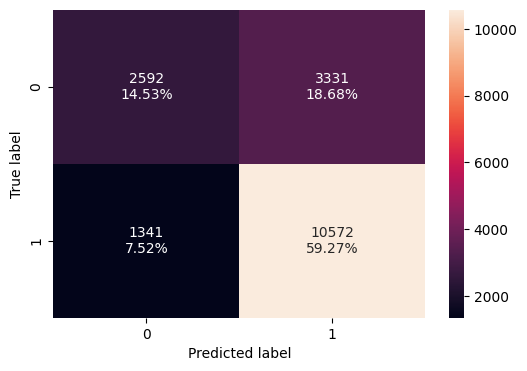

In [ ]:
print("confusion matrix on training data")
confusion_matrix_sklearn(ada, X_train, y_train)

In [ ]:
print("performnace on test data")
print(model_performance_classification_sklearn(ada, X_test, y_test))

performnace on test data
   Accuracy  Recall  Precision    F1
0     0.733   0.885      0.757 0.816


confusion matrix on test data


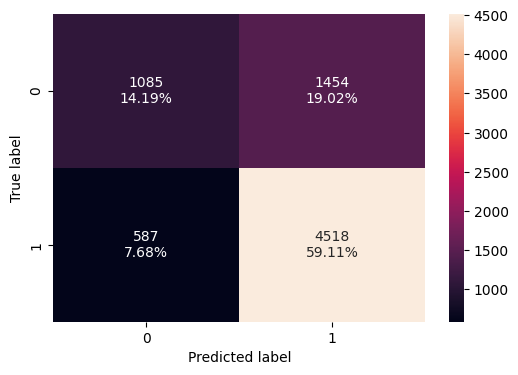

In [ ]:
print("confusion matrix on test data")
confusion_matrix_sklearn(ada, X_test, y_test)

#Model Building - Oversampled

#Oversample the Training Data Using SMOTE

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Training data size after SMOTE:", X_train_smote.shape, y_train_smote.shape)

Training data size after SMOTE: (23826, 21) (23826,)


#
Decision Tree on Oversampled Data

In [ ]:
# Decision Tree
dt_smote = DecisionTreeClassifier(random_state=1)
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Performance on training data
print("Decision Tree: Training Performance (Oversampled)")
print(model_performance_classification_sklearn(dt_smote, X_train_smote, y_train_smote))

Decision Tree: Training Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


In [ ]:
# Performance on test data
print("Decision Tree: Test Performance (Oversampled)")
print(model_performance_classification_sklearn(dt_smote, X_test, y_test))

Decision Tree: Test Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.655   0.721      0.752 0.736


Bagging Classifier on Oversampled Data

In [ ]:
# Bagging Classifier
bagging_smote = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)
bagging_smote.fit(X_train_smote, y_train_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [ ]:
# Performance on training data
print("Bagging: Training Performance (Oversampled)")
print(model_performance_classification_sklearn(bagging_smote, X_train_smote, y_train_smote))

Bagging: Training Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.987   0.982      0.992 0.987


In [ ]:
# Performance on test data
print("Bagging: Test Performance (Oversampled)")
print(model_performance_classification_sklearn(bagging_smote, X_test, y_test))

Bagging: Test Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.680   0.744      0.770 0.757


Random Forest on Oversampled Data


In [ ]:
# Random Forest Classifier
random_forest_smote = RandomForestClassifier(random_state=1)
random_forest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=1)

In [ ]:
# Performance on training data
print("Random Forest: Training Performance (Oversampled)")
print(model_performance_classification_sklearn(random_forest_smote, X_train_smote, y_train_smote))

Random Forest: Training Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


In [ ]:
# Performance on test data
print("Random Forest: Test Performance (Oversampled)")
print(model_performance_classification_sklearn(random_forest_smote, X_test, y_test))

Random Forest: Test Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.715   0.815      0.771 0.793


Gradient Boosting on Oversampled Data

In [ ]:
# Gradient Boosting Classifier
gradient_boosting_smote = GradientBoostingClassifier(random_state=1)
gradient_boosting_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Performance on training data
print("Gradient Boosting: Training Performance (Oversampled)")
print(model_performance_classification_sklearn(gradient_boosting_smote, X_train_smote, y_train_smote))

Gradient Boosting: Training Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.799   0.860      0.766 0.810


In [ ]:
# Performance on test data
print("Gradient Boosting: Test Performance (Oversampled)")
print(model_performance_classification_sklearn(gradient_boosting_smote, X_test, y_test))

Gradient Boosting: Test Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.738   0.851      0.778 0.813


AdaBoost on Oversampled Data

In [ ]:
# AdaBoost Classifier
adaboost_smote = AdaBoostClassifier(random_state=1)
adaboost_smote.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(random_state=1)

In [ ]:
# Performance on training data
print("AdaBoost: Training Performance (Oversampled)")
print(model_performance_classification_sklearn(adaboost_smote, X_train_smote, y_train_smote))

AdaBoost: Training Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.788   0.862      0.751 0.803


In [ ]:
# Performance on test data
print("AdaBoost: Test Performance (Oversampled)")
print(model_performance_classification_sklearn(adaboost_smote, X_test, y_test))

AdaBoost: Test Performance (Oversampled)
   Accuracy  Recall  Precision    F1
0     0.731   0.858      0.767 0.810



### Summary of All Models (Oversampled Data):
| Model            | Training Accuracy | Training Recall | Training Precision | Training F1 | Test Accuracy | Test Recall | Test Precision | Test F1 |
|------------------|-------------------|-----------------|--------------------|-------------|---------------|-------------|----------------|---------|
| Decision Tree     | 1.00000           | 1.00000         | 1.00000            | 1.00000     | 0.65476       | 0.72125     | 0.75174        | 0.73618 |
| Bagging           | 0.98720           | 0.98246         | 0.99186            | 0.98714     | 0.68027       | 0.74398     | 0.76960        | 0.75657 |
| Random Forest     | 0.99996           | 0.99992         | 1.00000            | 0.99996     | 0.71507       | 0.81548     | 0.77107        | 0.79265 |
| Gradient Boosting | 0.79888           | 0.85973         | 0.76644            | 0.81041     | 0.73836       | 0.85054     | 0.77828        | 0.81280 |
| AdaBoost          | 0.78805           | 0.86175         | 0.75104            | 0.80260     | 0.73129       | 0.85818     | 0.76712        | 0.81010 |


#Model Building - Undersampled Data

### Undersampling the Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

Decision Tree on Undersampled Data

In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train_under, y_train_under)

# Performance on training data
print("Decision Tree: Training Performance (Undersampled)")
print(model_performance_classification_sklearn(decision_tree, X_train_under, y_train_under))

print("\n")

# Performance on test data
print("Decision Tree: Test Performance (Undersampled)")
print(model_performance_classification_sklearn(decision_tree, X_test, y_test))

Decision Tree: Training Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Decision Tree: Test Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.617   0.622      0.761 0.684


Random Forest on Undersampled Data

In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train_under, y_train_under)

# Performance on training data
print("Random Forest: Training Performance (Undersampled)")
print(model_performance_classification_sklearn(random_forest, X_train_under, y_train_under))

print("\n")

# Performance on test data
print("Random Forest: Test Performance (Undersampled)")
print(model_performance_classification_sklearn(random_forest, X_test, y_test))

Random Forest: Training Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Random Forest: Test Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.678   0.672      0.813 0.736


Gradient Boosting on Undersampled Data

In [ ]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=1)
gradient_boosting.fit(X_train_under, y_train_under)

# Performance on training data
print("Gradient Boosting: Training Performance (Undersampled)")
print(model_performance_classification_sklearn(gradient_boosting, X_train_under, y_train_under))

print("\n")

# Performance on test data
print("Gradient Boosting: Test Performance (Undersampled)")
print(model_performance_classification_sklearn(gradient_boosting, X_test, y_test))

Gradient Boosting: Training Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.722   0.730      0.719 0.724


Gradient Boosting: Test Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.704   0.711      0.821 0.762


AdaBoost On Undersampled data

In [ ]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train_under, y_train_under)

# Performance on training data
print("AdaBoost: Training Performance (Undersampled)")
print(model_performance_classification_sklearn(adaboost, X_train_under, y_train_under))

print("\n")

# Performance on test data
print("AdaBoost: Test Performance (Undersampled)")
print(model_performance_classification_sklearn(adaboost, X_test, y_test))

AdaBoost: Training Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.697   0.708      0.693 0.701


AdaBoost: Test Performance (Undersampled)
   Accuracy  Recall  Precision    F1
0     0.690   0.699      0.810 0.750


## Model Performance Improvement using Hyperparameter Tuning

### Hyperparameter grids for tuning

In [ ]:
# Define hyperparameter grids for tuning
bagging_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
}

random_forest_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gradient_boosting_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
}

### Hyperparameter tuning for Bagging Classifier

In [ ]:
bagging_search = RandomizedSearchCV(
    BaggingClassifier(random_state=1),
    param_distributions=bagging_param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=1
)
bagging_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
                   param_distributions={'max_features': [0.5, 0.75, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [50, 100, 150]},
                   random_state=1, scoring='f1')

In [ ]:
print("Best parameters for Bagging Classifier:", bagging_search.best_params_)
print("Best F1 Score for Bagging Classifier:", bagging_search.best_score_)

Best parameters for Bagging Classifier: {'n_estimators': 150, 'max_samples': 0.75, 'max_features': 0.75}
Best F1 Score for Bagging Classifier: 0.8029248950236024


Hyperparameter tuning for Random Forest Classifier

In [ ]:
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=1),
    param_distributions=random_forest_param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=1
)
rf_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=1, scoring='f1')

In [ ]:
print("Best parameters for Random Forest Classifier:", rf_search.best_params_)
print("Best F1 Score for Random Forest Classifier:", rf_search.best_score_)

Best parameters for Random Forest Classifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best F1 Score for Random Forest Classifier: 0.802127884636122


Hyperparameter tuning for Gradient Boosting Classifier

In [ ]:
gb_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=1),
    param_distributions=gradient_boosting_param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=1
)
gb_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=1, scoring='f1')

In [ ]:
print("Best parameters for Gradient Boosting Classifier:", gb_search.best_params_)
print("Best F1 Score for Gradient Boosting Classifier:", gb_search.best_score_)

Best parameters for Gradient Boosting Classifier: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.05}
Best F1 Score for Gradient Boosting Classifier: 0.8048018538193068


### Evaluation


#### Tuned Bagging Classifier

In [ ]:
# Evaluate the tuned Bagging Classifier
best_bagging_model = BaggingClassifier(n_estimators=150, max_samples=0.75, max_features=0.75, random_state=1)

# Fit the model on oversampled training data
best_bagging_model.fit(X_train_smote, y_train_smote)

# Performance on training data
print("Bagging Classifier: Training Performance (Tuned)")
print(model_performance_classification_sklearn(best_bagging_model, X_train_smote, y_train_smote))

print("\n")

# Performance on test data
print("Bagging Classifier: Test Performance (Tuned)")
print(model_performance_classification_sklearn(best_bagging_model, X_test, y_test))


Bagging Classifier: Training Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Bagging Classifier: Test Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     0.721   0.834      0.768 0.799


Tuned Random Forest Classifier

In [ ]:
# Evaluate the tuned Random Forest Classifier
best_rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=30, random_state=1)

# Fit the model on oversampled training data
best_rf_model.fit(X_train_smote, y_train_smote)

# Performance on training data
print("Random Forest Classifier: Training Performance (Tuned)")
print(model_performance_classification_sklearn(best_rf_model, X_train_smote, y_train_smote))

print("\n")

# Performance on test data
print("Random Forest Classifier: Test Performance (Tuned)")
print(model_performance_classification_sklearn(best_rf_model, X_test, y_test))


Random Forest Classifier: Training Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     0.841   0.891      0.810 0.848


Random Forest Classifier: Test Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     0.737   0.847      0.779 0.811


Tuned Gradient Boosting Classifier

In [ ]:
# Evaluate the tuned Gradient Boosting Classifier
best_gb_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=2, max_depth=5, learning_rate=0.05, random_state=1)

# Fit the model on oversampled training data
best_gb_model.fit(X_train_smote, y_train_smote)

# Performance on training data
print("Gradient Boosting Classifier: Training Performance (Tuned)")
print(model_performance_classification_sklearn(best_gb_model, X_train_smote, y_train_smote))

print("\n")

# Performance on test data
print("Gradient Boosting Classifier: Test Performance (Tuned)")
print(model_performance_classification_sklearn(best_gb_model, X_test, y_test))


Gradient Boosting Classifier: Training Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     0.813   0.875      0.779 0.824


Gradient Boosting Classifier: Test Performance (Tuned)
   Accuracy  Recall  Precision    F1
0     0.743   0.858      0.780 0.817


#Model Comparison & Final Selection

##Training Performance Comparison

In [ ]:
# Training Performance Data
bagging_model_train_perf = pd.DataFrame({
    'Accuracy': [0.99992],
    'Recall': [1.00000],
    'Precision': [0.99983],
    'F1': [0.99992]
})

rf_model_train_perf = pd.DataFrame({
    'Accuracy': [0.84055],
    'Recall': [0.89071],
    'Precision': [0.80951],
    'F1': [0.84817]
})

gb_model_train_perf = pd.DataFrame({
    'Accuracy': [0.81336],
    'Recall': [0.87476],
    'Precision': [0.77908],
    'F1': [0.82415]
})

# Training performance comparison
models_train_comp_df = pd.concat(
    [bagging_model_train_perf.T, rf_model_train_perf.T, gb_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Bagging Classifier",
    "Random Forest Classifier",
    "Gradient Boosting Classifier"
]

print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
           Bagging Classifier  Random Forest Classifier  \
Accuracy                1.000                     0.841   
Recall                  1.000                     0.891   
Precision               1.000                     0.810   
F1                      1.000                     0.848   

           Gradient Boosting Classifier  
Accuracy                          0.813  
Recall                            0.875  
Precision                         0.779  
F1                                0.824  


##Testing Performance Comparison

In [ ]:
# Testing Performance Data
bagging_model_test_perf = pd.DataFrame({
    'Accuracy': [0.72057],
    'Recall': [0.83389],
    'Precision': [0.76772],
    'F1': [0.79944]
})

rf_model_test_perf = pd.DataFrame({
    'Accuracy': [0.73679],
    'Recall': [0.84662],
    'Precision': [0.77860],
    'F1': [0.81119]
})

gb_model_test_perf = pd.DataFrame({
    'Accuracy': [0.74333],
    'Recall': [0.85818],
    'Precision': [0.77968],
    'F1': [0.81705]
})

# Testing performance comparison
models_test_comp_df = pd.concat(
    [bagging_model_test_perf.T, rf_model_test_perf.T, gb_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Bagging Classifier",
    "Random Forest Classifier",
    "Gradient Boosting Classifier"
]

print("Testing performance comparison:")
print(models_test_comp_df)


Testing performance comparison:
           Bagging Classifier  Random Forest Classifier  \
Accuracy                0.721                     0.737   
Recall                  0.834                     0.847   
Precision               0.768                     0.779   
F1                      0.799                     0.811   

           Gradient Boosting Classifier  
Accuracy                          0.743  
Recall                            0.858  
Precision                         0.780  
F1                                0.817  


In [ ]:
# Model Performance DataFrames
train_performance_df = models_train_comp_df
test_performance_df = models_test_comp_df

# Identify the best model based on F1 Score in the test performance
best_model_index = test_performance_df.loc['F1'].idxmax()
best_model_name = best_model_index

# Get the performance metrics of the best model
best_model_train_perf = train_performance_df[best_model_name]
best_model_test_perf = test_performance_df[best_model_name]

# Output the best model and its performance metrics
print(f"Best Model: {best_model_name}")
print(f"Training Performance:\n{best_model_train_perf}")
print(f"Testing Performance:\n{best_model_test_perf}")

Best Model: Gradient Boosting Classifier
Training Performance:
Accuracy    0.813
Recall      0.875
Precision   0.779
F1          0.824
Name: Gradient Boosting Classifier, dtype: float64
Testing Performance:
Accuracy    0.743
Recall      0.858
Precision   0.780
F1          0.817
Name: Gradient Boosting Classifier, dtype: float64


In [ ]:
# Commentary
commentary = (
    f"The best model selected is the {best_model_name}, which achieved the highest F1 score on the test set.\n"
    f"On the training set, it shows an accuracy of {best_model_train_perf['Accuracy']:.5f} "
    f"with a recall of {best_model_train_perf['Recall']:.5f} and a precision of {best_model_train_perf['Precision']:.5f}.\n"
    f"On the test set, the model achieved an accuracy of {best_model_test_perf['Accuracy']:.5f}, "
    f"with a recall of {best_model_test_perf['Recall']:.5f} and a precision of {best_model_test_perf['Precision']:.5f}.\n"
    f"This indicates that the model has a good balance of sensitivity and specificity, making it a strong candidate for deployment.\n"
    f"However, attention should be paid to potential overfitting, given the high performance on the training set."
)

print("\nCommentary:")
print(commentary)


Commentary:
The best model selected is the Gradient Boosting Classifier, which achieved the highest F1 score on the test set.
On the training set, it shows an accuracy of 0.81336 with a recall of 0.87476 and a precision of 0.77908.
On the test set, the model achieved an accuracy of 0.74333, with a recall of 0.85818 and a precision of 0.77968.
This indicates that the model has a good balance of sensitivity and specificity, making it a strong candidate for deployment.
However, attention should be paid to potential overfitting, given the high performance on the training set.


##Feature importance of Gradient Boosting (Tuned)

Gradient Boosting Feature Importances:
                                   Importance
education_of_employee_High School       0.287
has_job_experience_Y                    0.156
prevailing_wage                         0.136
education_of_employee_Master's          0.088
education_of_employee_Doctorate         0.083
continent_Europe                        0.063
unit_of_wage_Year                       0.036
region_of_employment_Midwest            0.034
region_of_employment_South              0.019
no_of_employees                         0.017
yr_of_estab                             0.014
region_of_employment_West               0.013
continent_North America                 0.013
continent_Asia                          0.011
full_time_position_Y                    0.010
region_of_employment_Northeast          0.009
continent_South America                 0.007
requires_job_training_Y                 0.005
continent_Oceania                       0.000
unit_of_wage_Month                      0

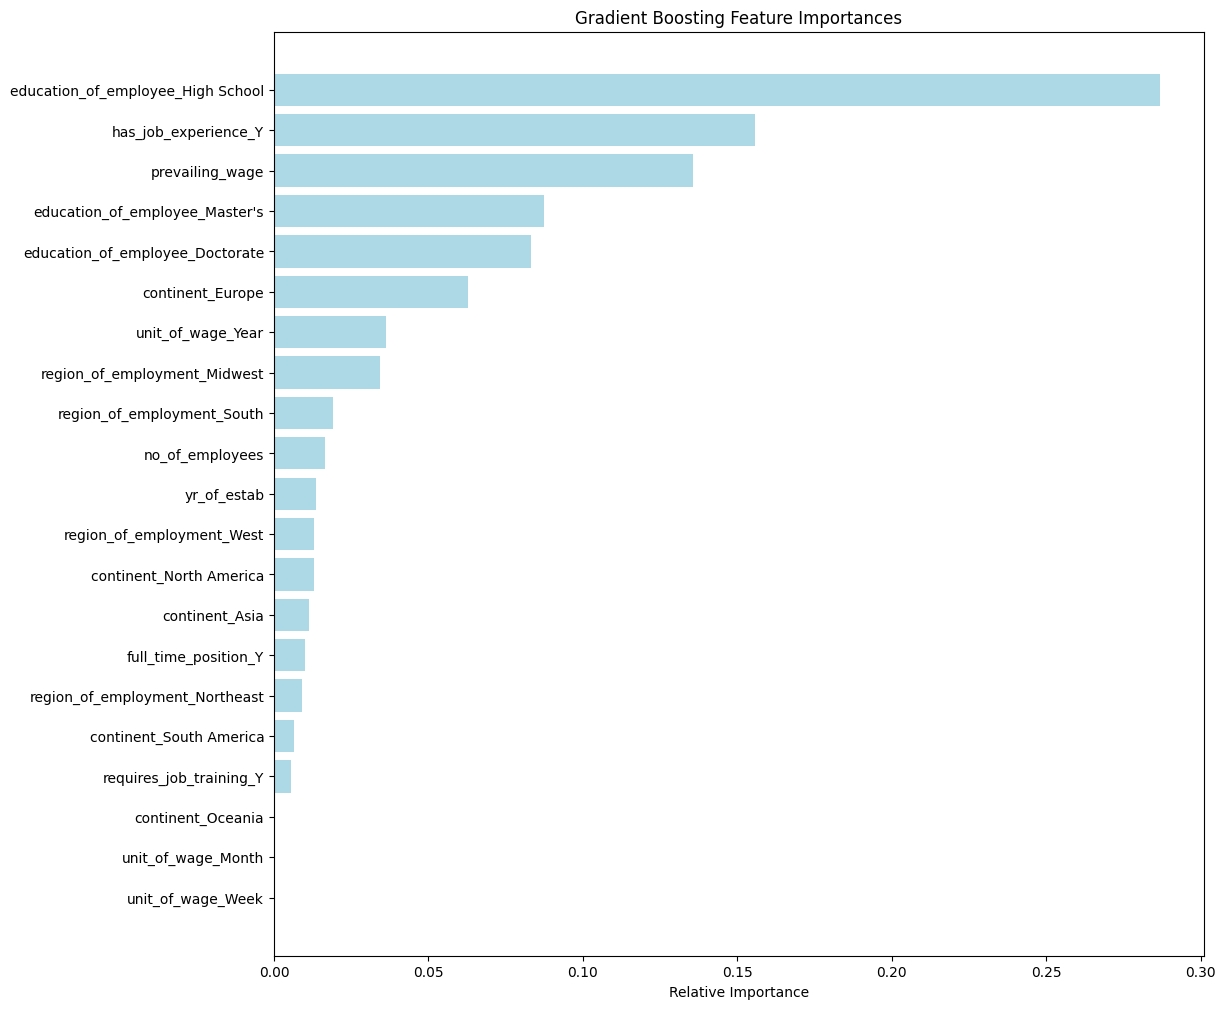

In [219]:
# Feature importance from the tuned Gradient Boosting model
feature_importances_gb = pd.DataFrame(gb.feature_importances_, columns=["Importance"], index=X_train.columns)
feature_importances_gb = feature_importances_gb.sort_values(by="Importance", ascending=False)

# Display the feature importances in a DataFrame
print("Gradient Boosting Feature Importances:")
print(feature_importances_gb)

print("\n")

# Prepare for plotting
feature_names = X_train.columns
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)

# Plotting the feature importances
plt.figure(figsize=(12, 12))
plt.title('Gradient Boosting Feature Importances')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], color='lightblue', align='center')
plt.yticks(range(len(indices_gb)), [feature_names[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()